In [45]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('~/Documents/GitHub/LTY-Spectral-Classification/data files/model_results.csv')

In [48]:
df.sort_values(by="rmse")

,model,dataset,rmse,r2,within_1,within_2
7,XGB Regressor,3-band,0.910472,0.868734,0.936170,0.981763
8,Tuned XGB Regressor,2-band,1.865529,0.918847,0.705224,0.873134
4,MLP Regressor,2-band,1.954343,0.910937,0.654851,0.835821
6,XGB Regressor,2-band,2.101987,0.896971,0.712687,0.860075
2,Random Forest,2-band,2.127000,0.892472,0.679104,0.845149
3,Random Forest,3-band,2.127000,0.884929,0.759878,0.933131
0,Linear Regressor,2-band,2.197179,0.727289,0.538710,0.787097
1,Linear Regressor,3-band,2.197179,0.727289,0.538710,0.787097
5,MLP Regressor,3-band,4.155456,0.151284,0.741641,0.914894


In [49]:
sns.set(style="whitegrid", context="talk")


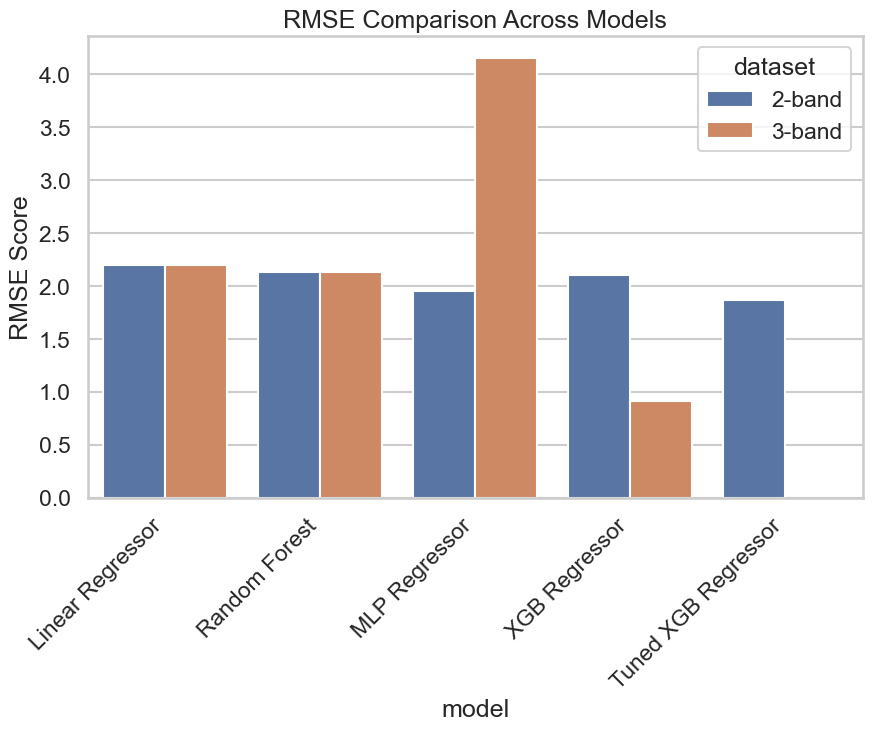

In [50]:
#create bar graph comparing models and their rmse values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="rmse", hue="dataset")
plt.xticks(rotation=45, ha='right')
plt.title("RMSE Comparison Across Models")
plt.ylabel("RMSE Score")
plt.show()


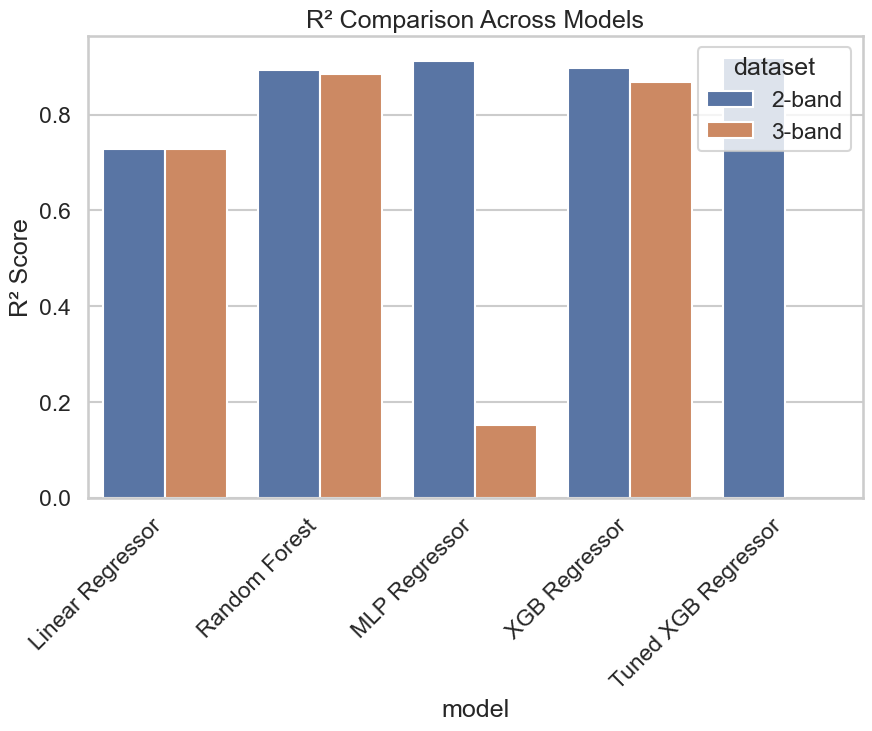

In [51]:
#create bar graph comparing models and their r2 values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="r2", hue="dataset")
plt.xticks(rotation=45, ha='right')
plt.title("R² Comparison Across Models")
plt.ylabel("R² Score")
plt.show()


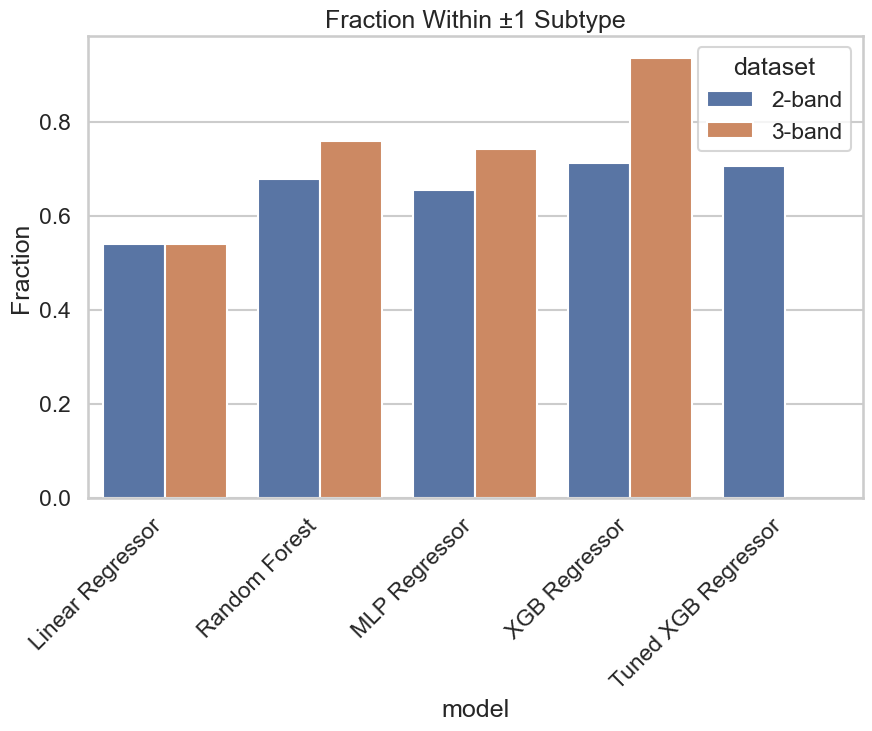

In [52]:
#create bar graph comparing models and their within 1 subtype values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="within_1", hue="dataset")
plt.xticks(rotation=45, ha='right')
plt.title("Fraction Within ±1 Subtype")
plt.ylabel("Fraction")
plt.show()


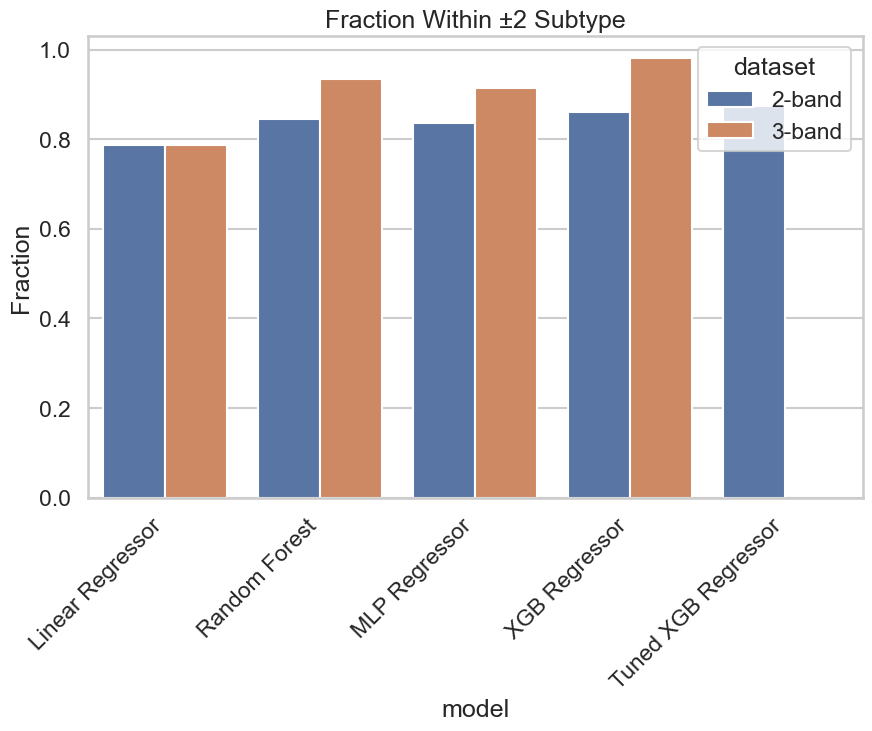

In [53]:
#create bar graph comparing models and their within 2 subtype values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="within_2", hue="dataset")
plt.xticks(rotation=45, ha='right')

plt.title("Fraction Within ±2 Subtype")
plt.ylabel("Fraction")
plt.show()

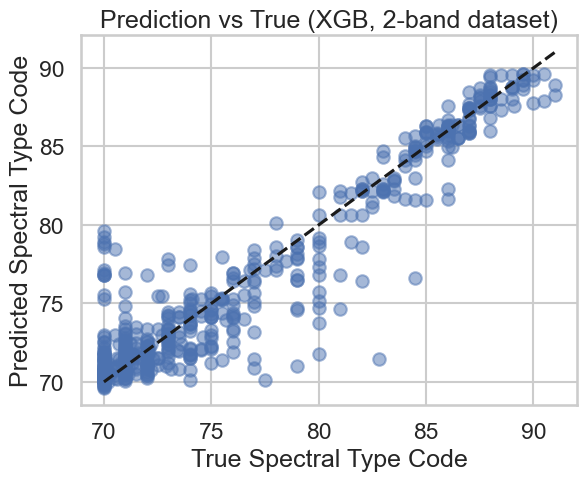

In [54]:
import model_training.model_imports as mi
import os

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/y_pred_xgb_2band.npy")
y_pred = np.load(path)
plt.scatter(mi.y_test, y_pred, alpha=0.5)
plt.plot([mi.y_test.min(), mi.y_test.max()], [mi.y_test.min(), mi.y_test.max()], 'k--')
plt.xlabel("True Spectral Type Code")
plt.ylabel("Predicted Spectral Type Code")
plt.title("Prediction vs True (XGB, 2-band dataset)")
plt.show()


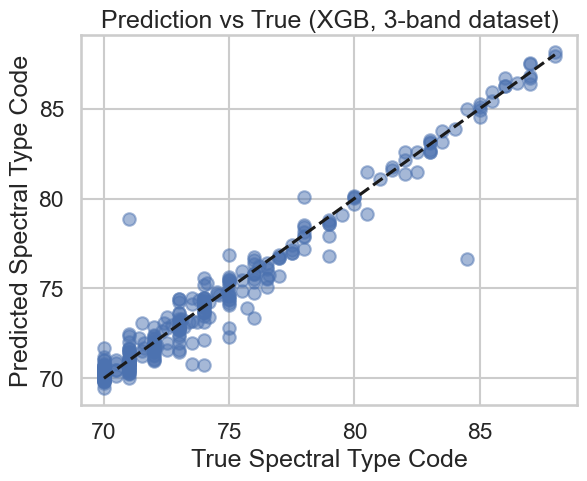

In [55]:
path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/y_pred_xgb_3band.npy")
y_pred_3band = np.load(path)
plt.scatter(mi.y_3bands_test, y_pred_3band, alpha=0.5)
plt.plot([mi.y_3bands_test.min(), mi.y_3bands_test.max()], [mi.y_3bands_test.min(), mi.y_3bands_test.max()], 'k--')
plt.xlabel("True Spectral Type Code")
plt.ylabel("Predicted Spectral Type Code")
plt.title("Prediction vs True (XGB, 3-band dataset)")
plt.show()


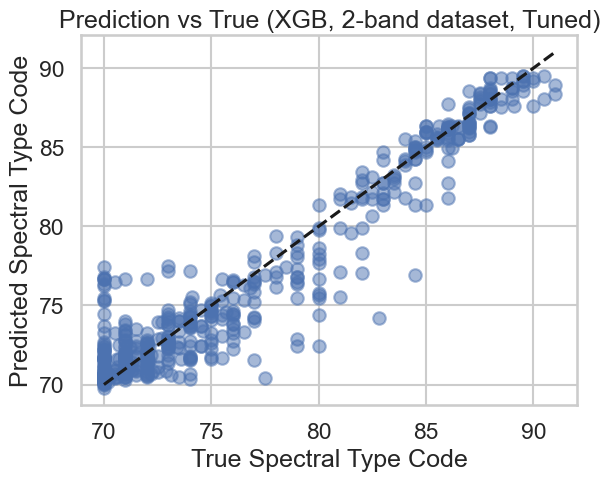

In [56]:
path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/y_pred_xgb_tuned.npy")
y_pred_tuned = np.load(path)
plt.scatter(mi.y_test, y_pred_tuned, alpha=0.5)
plt.plot([mi.y_test.min(), mi.y_test.max()], [mi.y_test.min(), mi.y_test.max()], 'k--')
plt.xlabel("True Spectral Type Code")
plt.ylabel("Predicted Spectral Type Code")
plt.title("Prediction vs True (XGB, 2-band dataset, Tuned)")
plt.show()


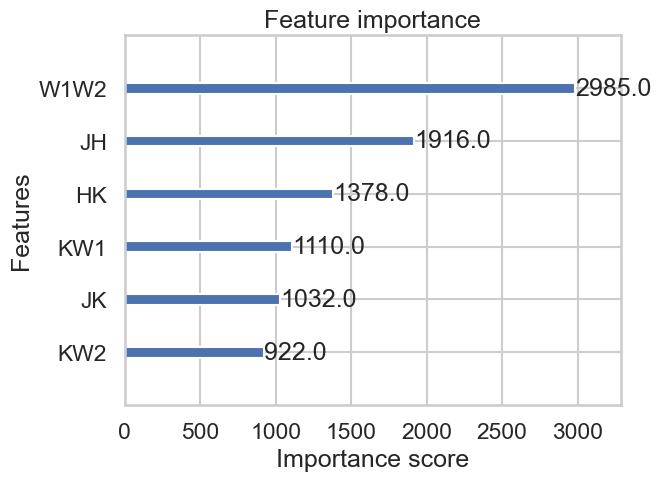

In [57]:
#feature importance for xgboost model
#2 band model
import matplotlib.pyplot as plt
import xgboost as xgb

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/xgb_model_2band.npy")
xgb_model_2band = np.load(path, allow_pickle=True).item()
xgb.plot_importance(xgb_model_2band, max_num_features=10)
plt.show()

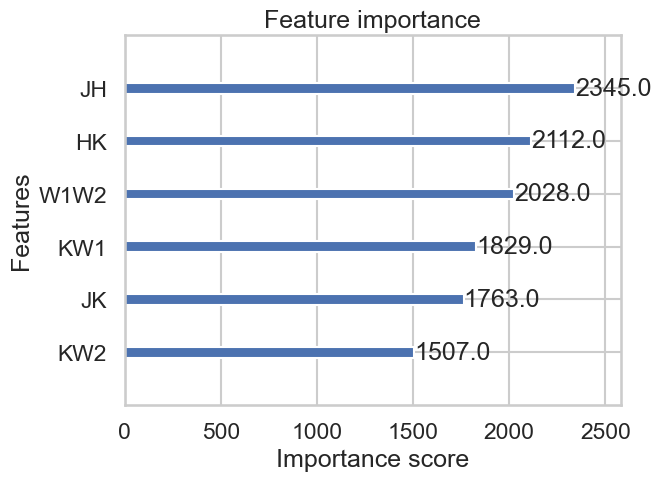

In [58]:
#3 band model 

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/xgb_model_3band.npy")
xgb_model_3band = np.load(path, allow_pickle=True).item()
xgb.plot_importance(xgb_model_3band, max_num_features=10)
plt.show()

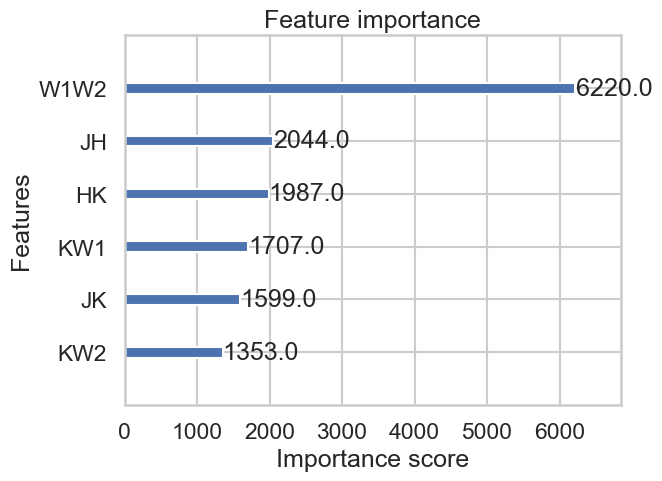

In [59]:
#tuned 2 band model 

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/xgb_model_tuned.npy")
xgb_model_tuned = np.load(path, allow_pickle=True).item()
xgb.plot_importance(xgb_model_tuned, max_num_features=10)
plt.show()

In [61]:
def major_class(code):
    if 70 <= code < 80:
        return "L"
    elif 80 <= code < 90:
        return "T"
    elif 90 <= code < 100:
        return "Y"
    else:
        return "?"


In [62]:
from sklearn.metrics import confusion_matrix

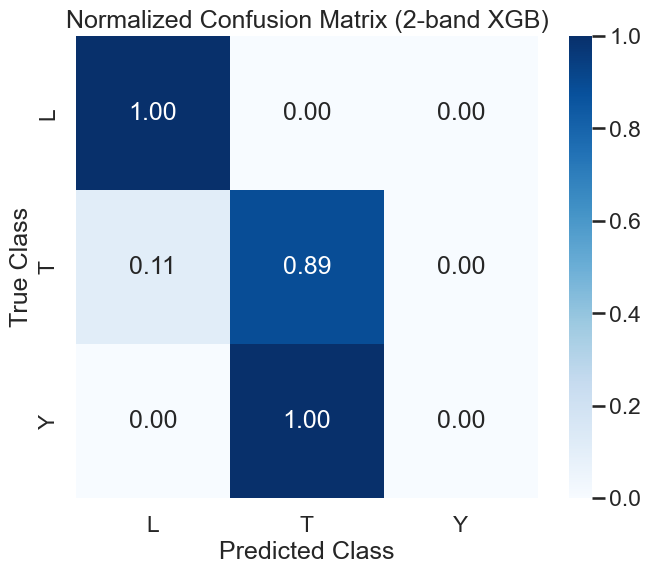

In [ ]:
# Convert numeric predictions to major class labels
y_pred_classes = [major_class(code) for code in y_pred]
y_test_classes = [major_class(code) for code in mi.y_test]

labels = ["L", "T", "Y"]

cm = confusion_matrix(y_test_classes, y_pred_classes, labels=labels)

# Normalize (divide each row by its total)
cm_norm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(
    cm_norm,
    annot=True,          # show numbers on the heatmap
    fmt=".2f",           # two decimal places
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    square=True
)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Normalized Confusion Matrix (2-band XGB)")
plt.show()


/var/folders/tq/3p74wzw520v3rnlg3yln0g6m0000gp/T/ipykernel_39954/664959656.py:8: RuntimeWarning: invalid value encountered in divide
  cm_norm_3band = cm_3band.astype(float) / cm_3band.sum(axis=1)[:, np.newaxis]


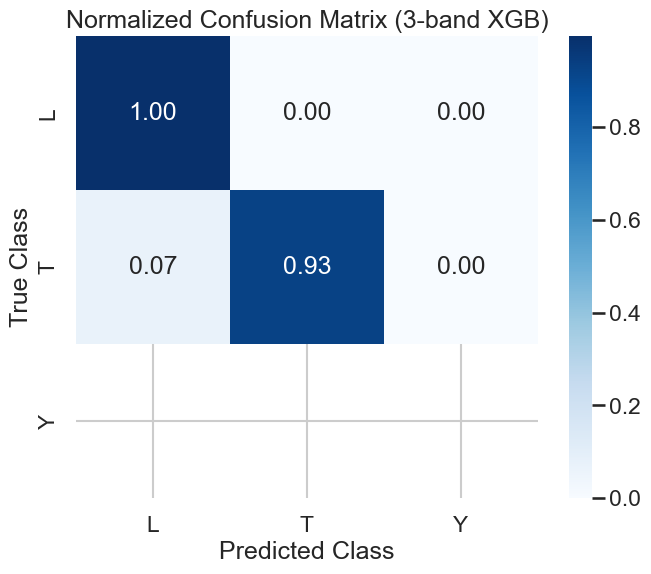

In [68]:
# Convert numeric predictions to major class labels
y_pred_classes_3band = [major_class(code) for code in y_pred_3band]
y_test_classes_3band = [major_class(code) for code in mi.y_3bands_test]

cm_3band = confusion_matrix(y_test_classes_3band, y_pred_classes_3band, labels=labels)

# Normalize (divide each row by its total)
cm_norm_3band = cm_3band.astype(float) / cm_3band.sum(axis=1)[:, np.newaxis]

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(
    cm_norm_3band,
    annot=True,          # show numbers on the heatmap
    fmt=".2f",           # two decimal places
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    square=True
)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Normalized Confusion Matrix (3-band XGB)")
plt.show()

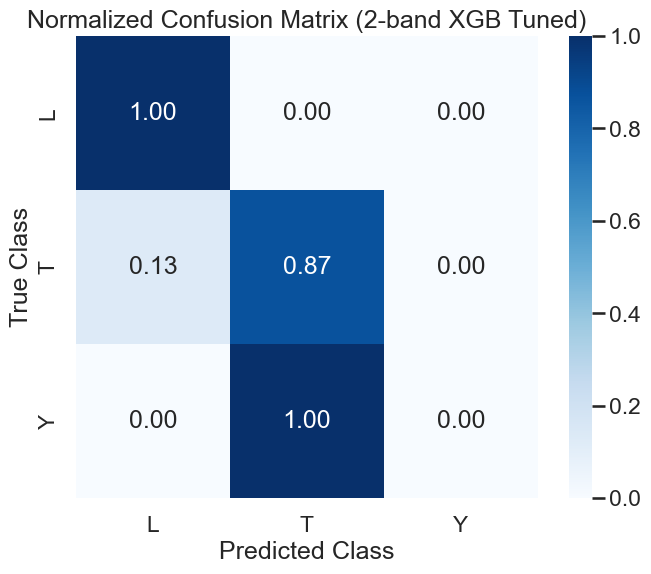

In [69]:
# Convert numeric predictions to major class labels
y_pred_classes_tuned = [major_class(code) for code in y_pred_tuned]
y_test_classes_tuned = [major_class(code) for code in mi.y_test]
cm_tuned = confusion_matrix(y_test_classes_tuned, y_pred_classes_tuned, labels=labels)

# Normalize (divide each row by its total)
cm_norm_tuned = cm_tuned.astype(float) / cm_tuned.sum(axis=1)[:, np.newaxis]

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(
    cm_norm_tuned,
    annot=True,          # show numbers on the heatmap
    fmt=".2f",           # two decimal places
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    square=True
)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Normalized Confusion Matrix (2-band XGB Tuned)")
plt.show()


In [72]:
def convert_spt_code_to_string(spectral_code, decimals=1):
    """
    Convert spectral type codes to string values

    Parameters
    ----------
    spectral_code : float
        A spectral type code

    decimals : int
        Number of decimal places to include in the spectral type string

    Returns
    -------
    spectral_type_string : str
        spectral type string
    """
    spt_type = ""

    # Identify major type
    if 60 <= spectral_code < 70:
        spt_type = "M"
    elif 70 <= spectral_code < 80:
        spt_type = "L"
    elif 80 <= spectral_code < 90:
        spt_type = "T"
    elif 90 <= spectral_code < 100:
        spt_type = "Y"

    # Numeric part of type
    format = f".{decimals}f"
    spt_type = f"{spt_type}{spectral_code% 10:{format}}"

    return spt_type

In [73]:
def make_subtype_error_plot_strings(y_true, y_pred, title):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    df_err = pd.DataFrame({
        "true": y_true,
        "pred": y_pred,
        "abs_err": np.abs(y_true - y_pred)
    })

    # Mean error per subtype
    avg_err = df_err.groupby("true")["abs_err"].mean()

    # Use YOUR function to convert codes to strings
    x_labels = [convert_spt_code_to_string(code, decimals=0) for code in avg_err.index]

    plt.figure(figsize=(12, 5))
    plt.plot(x_labels, avg_err.values, marker="o")
    
    plt.xlabel("Spectral Subtype")
    plt.ylabel("Mean Absolute Error")
    plt.title(title)
    plt.grid(True)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


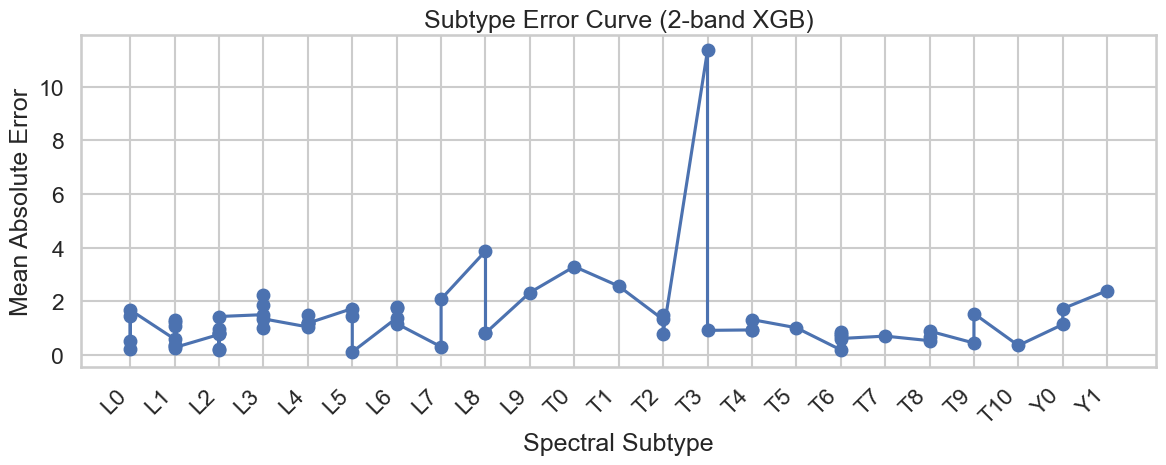

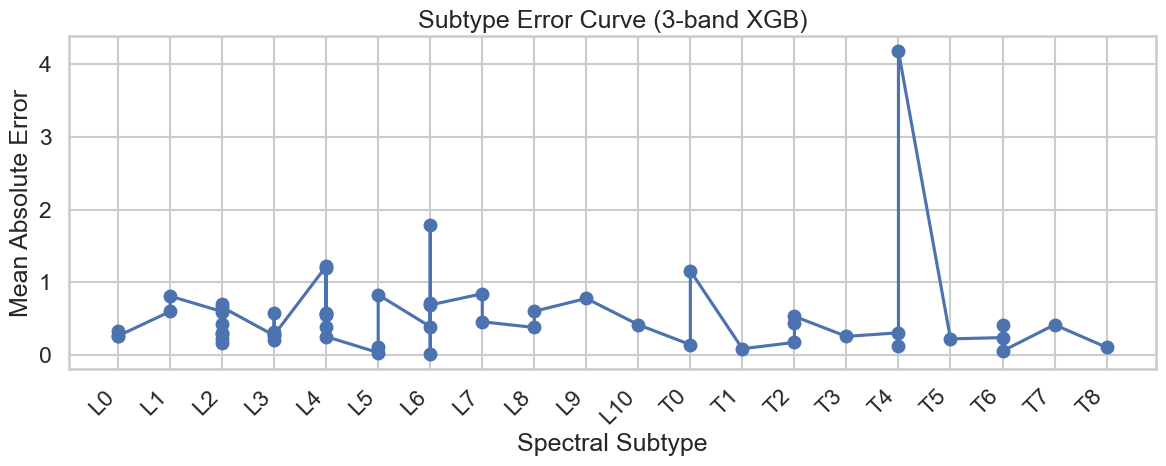

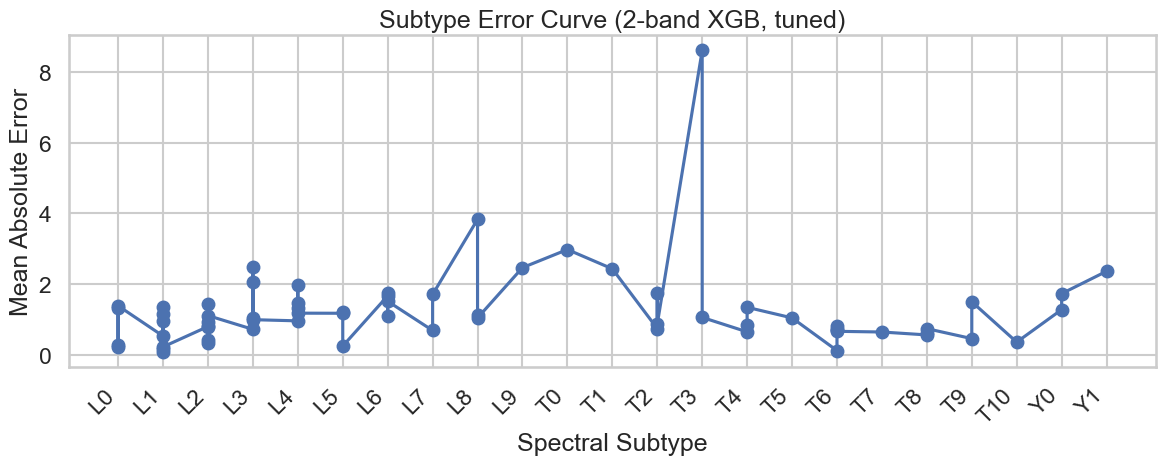

In [74]:
make_subtype_error_plot_strings(mi.y_test, y_pred, 
                        "Subtype Error Curve (2-band XGB)")
make_subtype_error_plot_strings(mi.y_3bands_test, y_pred_3band, 
                        "Subtype Error Curve (3-band XGB)")
make_subtype_error_plot_strings(mi.y_test, y_pred_tuned, 
                        "Subtype Error Curve (2-band XGB, tuned)")